In [1]:
#reading an excel file of adult analysis data and producing/saving the following plots

In [2]:
data_path = '/home/tli_project/Desktop/Data/T4/neurons/output/New/all_px_output_new/'
save_path = '/home/tli_project/Desktop/Data/T4/neurons/output/figures_final/'
save_plots = True

In [3]:
import utils.datautils as datautils
from tqdm import tqdm
import os
from os import path
import re
import numpy as np
import pandas as pd
import math
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.patches as mpatches
import seaborn as sns

plt.style.use('test.mplstyle')

%matplotlib inline

In [4]:
output_files = datautils.get_file_names(data_path, group_by='_', order=True, nested_files=False, criteria='.csv')

first 5 files
['/home/tli_project/Desktop/Data/T4/neurons/output/New/all_px_output_new/220209_P36_N2_stable1_sA.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/all_px_output_new/220209_P36_N1_stable1_sC.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/all_px_output_new/220127_P36_N1_stable1_sD.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/all_px_output_new/211121_P36.5_N3_stable1_sC.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/all_px_output_new/211121_P36.5_N2_stable1_sA.csv']


In [5]:
axon_pos = pd.read_csv('/home/tli_project/Desktop/Data/T4/neurons/output/New/TLI_axon_analysis.csv')
axon_pos.index = axon_pos.Neuron

In [6]:
# plotting individual subtypes at specific timepoint
Plot_t = 80
plot_col = 'PCA_elongation'
plt_order = ['A', 'B', 'C', 'D']
timepoints = {'timepoint':np.arange(36,58,0.25)}
collective_results = pd.DataFrame(timepoints)
#reading the specified column from each output file, and adding it to collective_results
for file in output_files:
    neu_name = os.path.basename(file[:file.find('.csv')])
    neu_name = neu_name[:6]+neu_name[neu_name.index('_N'):neu_name.index('_N')+3]
    temp_df = pd.read_csv(file, sep=',', usecols = ['timepoint', plot_col])
    temp_df = temp_df.rename(columns={plot_col:neu_name})
    collective_results = pd.merge(collective_results, temp_df, on='timepoint')

x_values = collective_results.loc[Plot_t][1:]
results = axon_pos.join(x_values)
results.rename(columns={80:'elongation'}, inplace=True)
results['Axon_pos'] = 1 - results.Axon/results.LobulaPlate

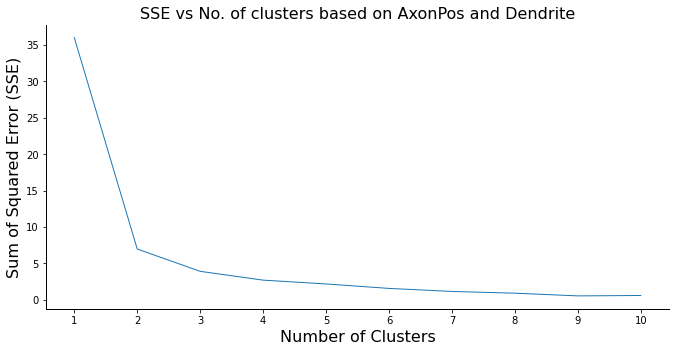

In [7]:
# checking the optimal number of clusters (supplementry figure) and conducting k-means clustering
scaled_df = StandardScaler().fit_transform(results.iloc[:,4:])

#initialize kmeans parameters
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)

#visualize results
fig, ax = plt.subplots(1)
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squared Error (SSE)")
plt.title("SSE vs No. of clusters based on AxonPos and Dendrite")
# ax.set_aspect('equal', 'box')
plt.style.use('test.mplstyle')

#instantiate the k-means class, using optimal number of clusters
kmeans = KMeans(init="random", n_clusters=2, n_init=10, random_state=1)

#fit k-means algorithm to data
kmeans.fit(scaled_df)

#view cluster assignments for each observation
kmeans.labels_

#append cluster assingments to original DataFrame
results['cluster'] = kmeans.labels_

plt_name = 'SuppFig3_A_SSEforelongation.pdf'
if save_plots:
    plt.savefig(save_path+plt_name)

In [8]:
# alternative to Suppfig3-A is the silhouette_vals, but somehow it's not working for me

# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_samples, silhouette_score

# #
# # Load IRIS dataset
# #
# X = results.Axon_pos
# X = np.array(X).reshape(1,-1)
# silhouette_vals = []

# clusters = [2,3,4,5,6]
# for i in clusters:
#     print(i)
#     clusterer = KMeans(n_clusters=i, random_state=42)
#     cluster_labels = clusterer.fit_predict(X)
#     silhouette_vals.append(silhouette_score(X, cluster_labels))

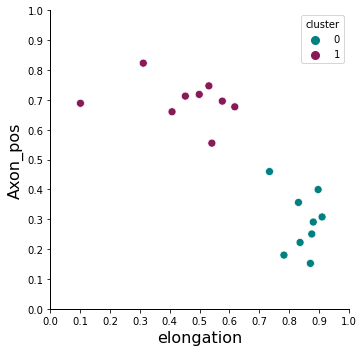

In [9]:
Colors = {'A':'teal','B':'teal','C':'#881a58','D':'#881a58', 0:'teal', 1:'#881a58', 2:'k', 3:'g'}

fig, ax = plt.subplots(1)
sns.scatterplot(data=results,x='elongation', y='Axon_pos', hue='cluster', palette=Colors)
ax.set_yticks(np.arange(0,1.1,0.1))
ax.set_xticks(np.arange(0,1.1,0.1))
ax.set_aspect('equal', 'box')

plt_name = 'Fig3_A_Axon_elongation_clustering.pdf'
if save_plots:
    plt.savefig(save_path+plt_name)

/tmp/ipykernel_859622/2465006260.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Horizontal['results_mean'] = Horizontal.mean(axis=1)
/tmp/ipykernel_859622/2465006260.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Horizontal['results_std'] = Horizontal.std(axis=1)
/tmp/ipykernel_859622/2465006260.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

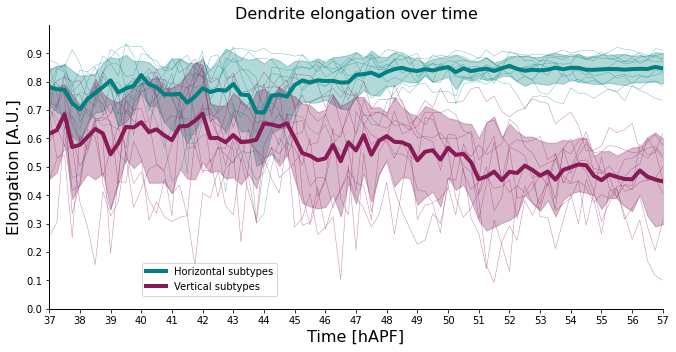

In [10]:
# plotting elongation overtime, seperated by subtype/cluster
timepoints = {'timepoint':np.arange(36,58,0.25)}
collective_results = pd.DataFrame(timepoints)
plot_col = 'PCA_elongation'
#reading the specified column from each output file, and adding it to collective_results
for file in output_files:
    neu_name = os.path.basename(file[:file.find('.csv')])
    # neu_name = neu_name[:6]+neu_name[neu_name.index('_N'):neu_name.index('_N')+3]
    temp_df = pd.read_csv(file, sep=',', usecols = ['timepoint', plot_col])
    temp_df = temp_df.rename(columns={plot_col:neu_name})
    collective_results = pd.merge(collective_results, temp_df, on='timepoint')

Horizontal_cols = [col for col in list(collective_results.columns) if (col[-1] == 'A') | (col[-1] == 'B')]
Horizontal = collective_results[Horizontal_cols]

Vertical_cols = [col for col in list(collective_results.columns) if (col[-1] == 'C') | (col[-1] == 'D')]
Vertical = collective_results[Vertical_cols]

fig, ax = plt.subplots(1)

ax.plot(collective_results.timepoint, Horizontal,c=Colors['A'], alpha=0.5, linewidth=0.5)
ax.plot(collective_results.timepoint, Vertical,c=Colors['C'],alpha=0.5, linewidth=0.5)

Horizontal['results_mean'] = Horizontal.mean(axis=1)
Horizontal['results_std'] = Horizontal.std(axis=1)
ax.plot(collective_results.timepoint, Horizontal.results_mean,
        c=Colors['A'], linewidth=4, label='Horizontal subtypes')
ax.fill_between(collective_results.timepoint, 
                y1 = Horizontal.results_mean - Horizontal.results_std, 
                y2= Horizontal.results_mean + Horizontal.results_std,
                alpha=0.3,
                color= Colors['A'])

Vertical['results_mean'] = Vertical.mean(axis=1)
Vertical['results_std'] = Vertical.std(axis=1)
ax.plot(collective_results.timepoint, Vertical['results_mean'],
        c=Colors['C'], linewidth=4, label='Vertical subtypes')
ax.fill_between(collective_results.timepoint, 
                y1 = Vertical.results_mean - Vertical.results_std, 
                y2 = Vertical.results_mean + Vertical.results_std,
                alpha=0.3,
                color= Colors['C'])

ax.set_ylim(0,1)
ax.set_yticks(np.arange(0,1,.1))
ax.set_xlim(37,57)
x_range1 = list(np.arange(37,58,1))
# x_range1.append(57)
ax.set_xticks(x_range1)

ax.set_title('Dendrite elongation over time')
ax.set_xlabel('Time [hAPF]')
ax.set_ylabel('Elongation [A.U.]')

plt.legend(bbox_to_anchor=(.38,0.18))

plt_name = 'Fig3_B_TLI_elongation_overtime_2.pdf'
if save_plots:
        plt.savefig(save_path+plt_name, bbox_inches='tight')

In [11]:
# Tried to do the changepoint detection using ruptures package but it didn't really work
# 
# import ruptures as rpt

# points = np.array(Horizontal.Mean)
# #RUPTURES PACKAGE
# #Changepoint detection with the Pelt search method
# model="rbf"
# algo = rpt.Pelt(model=model).fit(points)
# result = algo.predict(pen=10)
# rpt.display(points, result, figsize=(10, 6))
# plt.title('Change Point Detection: Pelt Search Method')
# plt.show()  
# #Changepoint detection with window-based search method
# model = "l2"  
# algo = rpt.Window(width=40, model=model).fit(points)
# my_bkps = algo.predict(n_bkps=10)
# rpt.show.display(points, my_bkps, figsize=(10, 6))
# plt.title('Change Point Detection: Window-Based Search Method')
# plt.show()

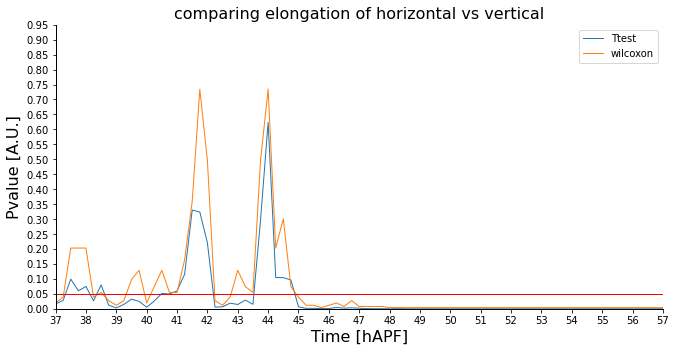

In [12]:
from scipy import stats
from scipy.stats import chi2_contingency 

T_tests = []
Wil_test = []
for i in range(len(collective_results)):
    group1 = collective_results.loc[i,Horizontal_cols]
    group2 = collective_results.loc[i,Vertical_cols]
    tStat, pValue = stats.ttest_ind(group1, group2, equal_var = True) #run independent sample T-Test
    T_tests.append(pValue)
    Wil_test.append(stats.wilcoxon(group1, group2)[1])
    # stat = chi2_contingency([group1,group2]) 

fig, ax = plt.subplots(1)
ax.plot(collective_results.timepoint,T_tests, label='Ttest')
ax.plot(collective_results.timepoint,Wil_test, label='wilcoxon')
ax.axhline(0.05,c='r')

ax.set_ylim(0,.8)
ax.set_yticks(np.arange(0,1,.05))
ax.set_xlim(37,57)
x_range1 = list(np.arange(37,58,1))
ax.set_xticks(x_range1)

ax.set_title('comparing elongation of horizontal vs vertical')
ax.set_xlabel('Time [hAPF]')
ax.set_ylabel('Pvalue [A.U.]')

plt.legend()

plt.style.use('test.mplstyle')
plt_name = 'SuppFig3_B_TLI_elongation_Ttest.pdf'
if save_plots:
        plt.savefig(save_path+plt_name, bbox_inches='tight')

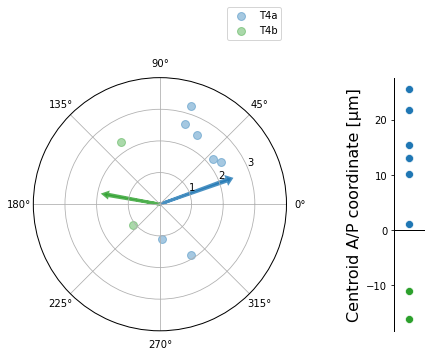

In [13]:
# plotting polar plots of main dendrite angle
Plot_t = 80
plt_order = ['A', 'B', 'C', 'D']
import_cols = ['timepoint', 'cen_EP_angle', 'cen_EP_dis', 'cen_EP_x', 'cen_EP_y']
# results = pd.DataFrame(columns=['distance', 'angle', 'cen_x', 'cen_y'])
results = pd.DataFrame(columns=import_cols[1:])
#reading the specified column from each output file, and adding it to collective_results
for file in output_files:
    neu_name = os.path.basename(file[:file.find('.csv')])
    neu_name = neu_name[:neu_name.index('_N')+3]+neu_name[-3:]
    temp_df = pd.read_csv(file, sep=',', usecols = import_cols)
    temp_df2 = temp_df.loc[Plot_t][1:]
    results.loc[neu_name] = temp_df2

results.rename(columns={import_cols[1]:'angle', import_cols[2]:'distance'}, inplace=True)

# calculate radius based on x,y. Make sure if you need to reverse y values
results['angle_rad'] = np.arctan2(-1*results.cen_EP_y,results.cen_EP_x)

A_sub = results.loc[[s for s in list(results.index) if '_sA' in s]]
B_sub = results.loc[[s for s in list(results.index) if '_sB' in s]]

Colors = {'A':"tab:blue",'B':"tab:green",'C':"tab:orange",'D':"tab:red"}

# plt.figure(figsize=(16,12))
# fig, ax = plt.subplots(nrows=1, ncols=2, subplot_kw={'projection': 'polar'})
ax1 = plt.subplot(121, projection='polar')
ax2 = plt.subplot(122)

c = Colors['A']
ax1.scatter(A_sub.angle_rad,A_sub.distance,color=c, label='T4a', alpha=.4)
ax1.arrow(A_sub.angle_rad.mean(), 0, 0, A_sub.distance.mean(), alpha = 0.8, width = 0.025,
                 edgecolor = c, facecolor = c, lw = 3, zorder = 1)

c = Colors['B']
ax1.scatter(B_sub.angle_rad,B_sub.distance,color=c, label='T4b', alpha=.4)
ax1.arrow(np.pi+B_sub.angle_rad.mean(), 0, 0, B_sub.distance.mean(), alpha = 0.8, width = 0.025,
                 edgecolor = c, facecolor = c, lw = 3, zorder = 1)

ax1.set_ylim(0,4)
ax1.set_yticks(range(1,4,1))
ax1.legend(bbox_to_anchor=(1,1.3))


sns.scatterplot(data=A_sub, y='cen_EP_x', x=1, color=Colors['A'], ax=ax2)
sns.scatterplot(data=B_sub, y='cen_EP_x', x=1, color=Colors['B'], ax=ax2)
plt.axhline(y = 0, color = 'k', linestyle = '-')
ax2.get_xaxis().set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.set_aspect(.02)
ax2.set_ylabel('Centroid A/P coordinate [µm]')

plt.style.use('test.mplstyle')
plt_name = 'Fig3_C_cen_EP_angle_Horizontal.pdf'
if save_plots:
    plt.savefig(save_path+plt_name)

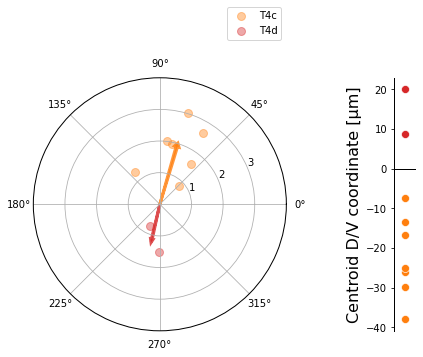

In [14]:
# plotting polar plots of main dendrite angle
Plot_t = 80
plt_order = ['A', 'B', 'C', 'D']
import_cols = ['timepoint', 'cen_EP_angle', 'cen_EP_dis', 'cen_EP_x', 'cen_EP_y']
# results = pd.DataFrame(columns=['distance', 'angle', 'cen_x', 'cen_y'])
results = pd.DataFrame(columns=import_cols[1:])
#reading the specified column from each output file, and adding it to collective_results
for file in output_files:
    neu_name = os.path.basename(file[:file.find('.csv')])
    neu_name = neu_name[:neu_name.index('_N')+3]+neu_name[-3:]
    temp_df = pd.read_csv(file, sep=',', usecols = import_cols)
    temp_df2 = temp_df.loc[Plot_t][1:]
    results.loc[neu_name] = temp_df2

results.rename(columns={import_cols[1]:'angle', import_cols[2]:'distance'}, inplace=True)

# calculate radius based on x,y. Make sure if you need to reverse y values
results['angle_rad'] = np.arctan2(-1*results.cen_EP_y,results.cen_EP_x)

C_sub = results.loc[[s for s in list(results.index) if '_sC' in s]]
D_sub = results.loc[[s for s in list(results.index) if '_sD' in s]]

Colors = {'A':"tab:blue",'B':"tab:green",'C':"tab:orange",'D':"tab:red"}

# plt.figure(figsize=(16,12))
# fig, ax = plt.subplots(nrows=1, ncols=2, subplot_kw={'projection': 'polar'})
ax1 = plt.subplot(121, projection='polar')
ax2 = plt.subplot(122)

c = Colors['C']
ax1.scatter(C_sub.angle_rad,C_sub.distance,color=c, label='T4c', alpha=.4)
ax1.arrow(C_sub.angle_rad.mean(), 0, 0, C_sub.distance.mean(), alpha = 0.8, width = 0.025,
                 edgecolor = c, facecolor = c, lw = 3, zorder = 1)

c = Colors['D']
ax1.scatter(D_sub.angle_rad,D_sub.distance,color=c, label='T4d', alpha=.4)
ax1.arrow(D_sub.angle_rad.mean(), 0, 0, D_sub.distance.mean(), alpha = 0.8, width = 0.025,
                 edgecolor = c, facecolor = c, lw = 3, zorder = 1)

ax1.set_ylim(0,4)
ax1.set_yticks(range(1,4,1))
ax1.legend(bbox_to_anchor=(1,1.3))


sns.scatterplot(data=C_sub, y='cen_EP_y', x=1, color=Colors['C'], ax=ax2)
sns.scatterplot(data=D_sub, y='cen_EP_y', x=1, color=Colors['D'], ax=ax2)
plt.axhline(y = 0, color = 'k', linestyle = '-')
ax2.get_xaxis().set_visible(False)
ax2.spines['bottom'].set_visible(False)
# plt.axis('off')
ax2.set_aspect(.02)
ax2.set_ylabel('Centroid D/V coordinate [µm]')

plt.style.use('test.mplstyle')
plt_name = 'Fig3_D_cen_EP_angle_Vertical.pdf'
if save_plots:
    plt.savefig(save_path+plt_name)